
本节会学习：
1. 线性回归模型
   1. 拟合过程
   2. 如何求解最优拟合方程-最小二乘法
   3. 如何评价线性模型的拟合结果好坏
   4. 在sklearn中使用LinearRegression并且使用MSE评价
2. 最小二乘法
   1. 原理，推导，案例
   2. 缺点和局限性
3. 梯度下降GD
   1. 什么是梯度下降，原理，推导，案例
   2. 梯度下降的关键参数学习率$\alpha$
   3. 梯度下降的三种变体，批量，随机，小批量(BGD,SGD,MBGD) [随机梯度下降]() [小批量梯度下降]()
   


# 线性回归 Linear Regression

现来看以下这样一组数据，假设为投入的营销费用和广告点击的关系，可以看到他们大致呈现正相关关系。在蓝点的中间，我们可以拟合初一条红色的线。这样，如果我们想知道一个新的广告方案的投入金额和点击的关系，就可以用红色线性方程y = 3x + 2来做预估，这个过程其实就是线性回归和利用线性回归做预测的过程。

但，这会产生2个问题：
- 当最开始我们有这一堆点的时候，怎么找出一个拟合的线性方程？-->拟合线性回归方程求解
- 我们怎么保证我们求的解就是最好的？比如同样有一根绿色线代表的方程，此时也穿过了大部分的点？-->损失函数求最小

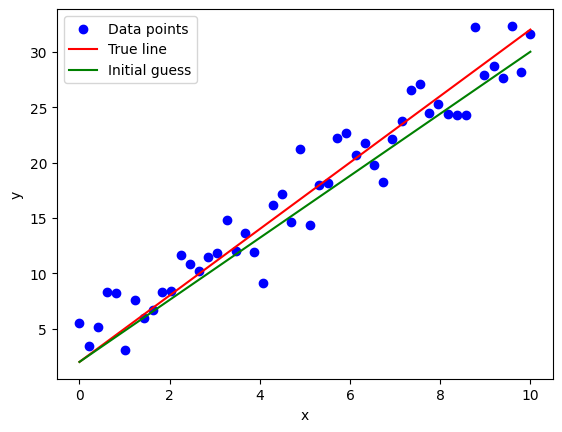

In [9]:
import numpy as np

# 设置随机种子，方便结果复现
np.random.seed(0)

# 生成 x
x = np.linspace(0, 10, 50)

# 真实模型: y = 3x + 2 + noise
true_w = 3
true_b = 2

noise = np.random.normal(0, 2, size=x.shape)
y = true_w * x + true_b + noise

#可视化
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, true_w * x + true_b, color='red', label='True line')
plt.plot(x, 2.8 * x + 2, color='green', label='Initial guess')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## 1.拟合过程（最小二乘法）
线性回归是机器学习中最经典、最简单的模型之一，主要用于回归任务。模型的输入为 $x$，目标是拟合一个线性方程 $y = wx + b$，通过寻找最佳的 $w$ 和 $b$，使得所有样本的累计平方误差之和 $\sum (y - \hat{y})^2$ 最小。

这里的 $(y - \hat{y})^2$ 称为平方误差（Least Squares），平方是为了消除符号带来的影响，并且放大离群值的影响。
而他们的和，一般称之为残差平方和SSE（Sum of Squares for Error），另一个经常使用的是MSE（均方误差），在机器学习中它是回归问题中最常用的损失函数。
MSE公式：
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
我们追求最小化这个损失函数的过程称为最小二乘法估计（会使用求偏导）

下面通过一个实际例子来理解线性回归的过程。最后我们将使用 sklearn 库中的线性回归模型，对一个经典数据集进行训练和求解。

先不管参数的问题，我们最终找到的线性方程是否有，对于任意预测的 $\hat{y}$，我们有 $\hat{y} = wx + b$。

那么，如果我们想让这条线更加的准，就应该让这条线的预测 $\hat{y}$ 和真实的 $y$ 差值尽量的小，也就有了 SSE（残差平方和）的概念，公式如下：

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (wx_i + b))^2  
$$



其中，$y_i$ 是第 $i$ 个样本的真实值，$\hat{y}_i$ 是模型预测值，$n$ 是样本数量。我们希望通过调整参数 $w$ 和 $b$，使得 SSE 最小化，从而得到最优的线性回归模型。

因此我们下一步的问题变成了如何找到最小的SSE？

对于SSE的方程,从几何角度来看，它是一个开口向上的凸曲面（类似于一个碗状）。在数学上，凸函数的一个优良性质是：它的局部极小值就是全局最小值。因此，我们要寻找最小的 SSE，实际上就是寻找这个“碗”底部的点，即函数导数为 0 的地方


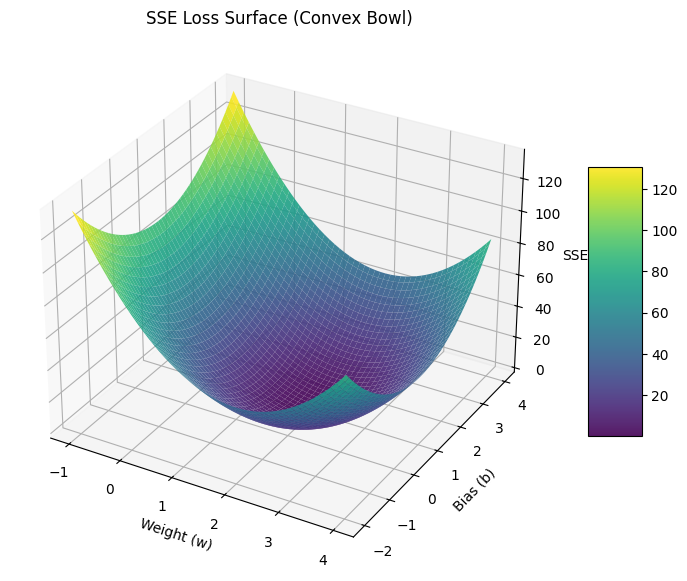

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 更简单的数据
x = np.linspace(-2, 2, 5)
y = 2 * x + 1

# 定义 SSE 函数
def calculate_sse(w, b, x, y):
    return np.sum((y - (w * x + b))**2)

# 更宽的参数范围，更细的网格
w_range = np.linspace(-1, 4, 200)
b_range = np.linspace(-2, 4, 200)
W, B = np.meshgrid(w_range, b_range)

# 计算 SSE
Z = np.array([[calculate_sse(w, b, x, y) for w in w_range] for b in b_range])

# 绘图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.9)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('SSE')
ax.set_title('SSE Loss Surface (Convex Bowl)')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


最小二乘法（Ordinary Least Squares）：利用微积分，分别对 $w$ 和 $b$ 求偏导并令其为 0，从而直接解出参数的解析表达式
们需要对 $w$ 和 $b$ 分别求偏导数：
$$
\frac{\partial SSE}{\partial w} = \sum_{i=1}^{n} 2(y_i - (wx_i + b)) \cdot (-x_i) = 0
$$
$$
\frac{\partial SSE}{\partial b} = \sum_{i=1}^{n} 2(y_i - (wx_i + b)) \cdot (-1) = 0
$$
通过展开和整理上述方程组（通常称为正规方程 Normal Equations）-详细推导见附录
$$b = \bar{y} - w\bar{x}$$
$$w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$

其中 $\bar{y}$ 和 $\bar{x}$ 是均值

**由此可以直接估计参数并且画图如下**


Estimated parameters: w = 3.27, b = 14.72


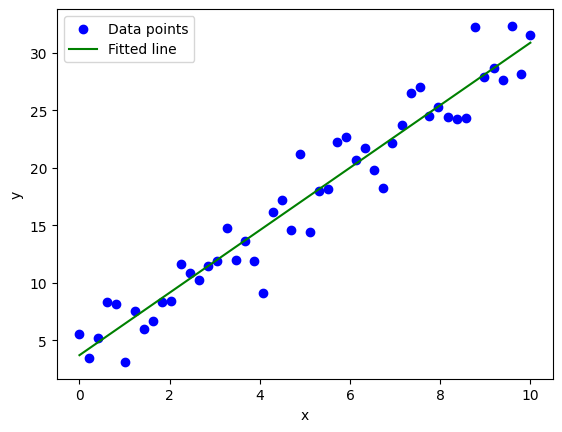

In [17]:
x_bar = np.mean(x)
y_bar = np.mean(y)
w1 = (np.sum((x - x_bar) * (y - y_bar)) /
      np.sum((x - x_bar) ** 2))
b1 = y_bar - w1 * x_bar

print(f"Estimated parameters: w = {w:.2f}, b = {b:.2f}")

# 可视化拟合结果
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, w1 * x + b1, color='green', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 2.多特征拟合
特征变多（比如不仅有 $x$，还有 $x_1, x_2, \dots$）时，代数公式会变得极其冗长，这个时候我们可以通过矩阵求解（还记得矩阵适合用来求解多项式方程组吗？）

$y$ (目标向量): $\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$

$X$ (特征矩阵): $\begin{bmatrix} 1 & x_{1,1} & x_{1,2} & x_{1,3} \\ 1 & x_{2,1} & x_{2,2} & x_{2,3} \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_{n,1} & x_{n,2} & x_{n,3} \end{bmatrix}$ （第一列全为 1，对应截距 $b$）

$\beta$ (参数向量): $\begin{bmatrix} b \\ w_1 \\ w_2 \\ w_3 \end{bmatrix}$

即：
$$
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & x_{1,3} \\
1 & x_{2,1} & x_{2,2} & x_{2,3} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{n,1} & x_{n,2} & x_{n,3}
\end{bmatrix}
\begin{bmatrix}
b \\
w_1 \\
w_2 \\
w_3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$
误差向量为 $e = y - X\beta$。误差平方和 $S=e^2=e^Te$ ,展开得到：$$S = (y - X\beta)^T(y - X\beta)$$

展开这个式子（像拆解多项式一样）：
$$S = y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta$$

我们的目标是找到一个最优解，使得S最小，自然想到对参数向量$\beta$求导，并令导数为0：

$$\frac{\partial S}{\partial \beta} = -2X^Ty + 2X^TX\beta = 0$$

整理得到：$X^TX\beta = X^Ty$，两边同时左乘逆矩阵:
$$(X^TX)^{-1} \cdot (X^TX) \beta = (X^TX)^{-1} \cdot X^Ty$$
$$I \cdot \beta = (X^TX)^{-1} X^Ty$$
任何矩阵乘以单位矩阵都保持不变（$I\beta = \beta$）
$$\beta = (X^TX)^{-1}X^Ty$$

这样通过一次求解，就可以立马算出多特征下的参数了，我们用一个实际的例子进行求解：

In [24]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 加载数据
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. 矩阵解法 (手动计算参数) ---
# 给训练集添加偏置项 (全1列)
#np.c_[A, B]: c 是 column（列） 的缩写。这个函数的作用是将两个矩阵按列的方向“左右拼接”
X_train_with_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# 核心公式: theta = (X^T * X)^-1 * X^T * y
# np.linalg.inv() 用于计算矩阵的逆，dot() 用于矩阵乘法
theta_best = np.linalg.inv(X_train_with_b.T.dot(X_train_with_b)).dot(X_train_with_b.T).dot(y_train)

# 在测试集上进行预测
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_matrix = X_test_b.dot(theta_best)

# --- 4. Sklearn 模型解法 ---
# 技术细节1：sklearn 的 LinearRegression 模型会自动添加截距项（bias），因此我们不需要手动添加全1列。
# 技术细节2：sklearn 的 LinearRegression 内部通常使用 SVD 分解 来处理，比直接求逆更稳定，尤其是在特征之间存在多重共线性的情况下。
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# --- 5. 计算 MSE 标准评分 ---
mse_matrix = mean_squared_error(y_test, y_pred_matrix)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("\n[矩阵解法] 截距与系数:")
print(theta_best)
sklearn_params = np.concatenate(([model.intercept_], model.coef_))
print("\n[Sklearn] 截距与系数:")
print(sklearn_params)
is_matching = np.allclose(theta_best, sklearn_params)
print(f"\n两个结果是否一致: {is_matching}")
print(f"矩阵解法测试集 MSE: {mse_matrix:.6f}")
print(f"Sklearn 测试集 MSE: {mse_sklearn:.6f}")
print(f"两者误差差异: {abs(mse_matrix - mse_sklearn):.12f}")


[矩阵解法] 截距与系数:
[-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]

[Sklearn] 截距与系数:
[-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]

两个结果是否一致: True
矩阵解法测试集 MSE: 0.555892
Sklearn 测试集 MSE: 0.555892
两者误差差异: 0.000000000000


---



## 3.梯度下降(gradient descent)

在前面的内容中，我们通过最小二乘法（Normal Equation）推导出了线性回归参数的解析解，并且在单特征和多特征情况下都可以直接通过公式一次性求解出最优参数。这种方法在特征数量较少、数据量适中的情况下非常高效且精确。

然而，随着实际问题中数据规模的不断扩大，尤其是特征数量（维度）非常多时，最小二乘法的解析解会面临两个主要挑战：

1. **计算复杂度高**：最小二乘法需要计算矩阵的逆（如 $(X^TX)^{-1}$），而矩阵求逆的计算复杂度为 $O(n^3)$，当特征数量$n$很大时，计算和内存消耗都非常高，甚至可能无法完成。
2. **数值不稳定**：如果特征之间存在高度相关（多重共线性），或者数据本身存在噪声，矩阵$X^TX$可能接近奇异（不可逆），导致解析解不稳定甚至无法求解。
3. **通用性**：很多复杂的模型（如神经网络）没有解析解公式，只能靠梯度下降

为了解决这些问题，我们引入了**梯度下降**算法。梯度下降是一种迭代优化方法，不需要直接求解矩阵逆，而是通过不断调整参数，使损失函数（如MSE）逐步减小，最终收敛到最优解。梯度下降不仅适用于大规模数据和高维特征，还为后续更复杂的模型（如神经网络）提供了通用的优化框架。

因此，梯度下降算法成为现代机器学习中最常用、最基础的参数优化方法之一。
先来一个简单的例子理解这一过程：

**试想你正在一个碗状的山上，你的目的是到达碗底，在任一点，有两个方向的指示牌(W和b)，并且指示牌上告诉你往某个方向(符号)的坡度是多少(数值)，那么你就可以根据这两个指示牌，快速知道最陡峭的下坡方向。到了一个新点以后（参数更新），同样的过程重复一次（迭代），直到你站到了一个四周都是上坡的地方（导数为0）**

先回到我们上文引出的损失函数，MSE中(这里使用了MSE而非SSE作为示例)：
$$J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (f(x_i) - y_i)^2$$
对于线性回归损失函数来说，常见的做法是在公式前乘以 $\frac{1}{2}$，这样在后续对参数求导时，平方项的导数前的系数会被抵消，使梯度表达式更加简洁，便于推导和实现。这个操作不会影响损失函数的最小值位置，只是数学上的便利。
$$J(w, b) = \frac{1}{2n} \sum_{i=1}^{n} (f(x_i) - y_i)^2$$


在这里我们回顾下偏导数的概念：反映了空间中某一点沿着平行于坐标轴的方向的变化率，其符号标志着变化方向，为正表示参数增加，函数目标值增加，为负反之。因此我们就应该沿着梯度的反方向更新参数，即在原始参数减去计算得到的梯度。
如果我们对函数J分别求w和b的偏导，就能得到在MSE空间中的某一个点，我们在w和b上的变化率。这个变化率我们也称之为梯度gradient，得到梯度后，就可以根据梯度进行参数的更新：
$$w = w - \alpha \cdot \frac{\partial J}{\partial w}$$
$$b = b - \alpha \cdot \frac{\partial J}{\partial b}$$

- 对于减去梯度的说明：如果梯度>0，说明参数增加，误差变大，应该降低参数值，即减去一个量；如果梯度小于0，说明参数增加以后，误差会变小，我们应该增加参数值，负负得正，参数增加

- 其中 $\alpha$ (Learning Rate, 学习率) 是最重要的超参数：
  - 太大会“跳过”谷底，导致不收敛（甚至发散）。
  - 太小会导致“走得太慢”，猴年马月才能跑完。


以上就是梯度下降的本质，接下来让我们用一个实际的案例演示来帮助完全理解这一过程：


### 3.1 案例讲解梯度下降

根据“奶茶店的排队人数 ($x$)”预测“当日营业额 ($y$)”，假设我们有两组简化数据：

- 排队 1 人，营业额 2 元：$(1, 2)$  
- 排队 3 人，营业额 4 元：$(3, 4)$  

我们的目标是找到最合适的函数 $f(x) = wx+b$。

**1. 定义代价函数（目标）**  
我们需要衡量预测值和实际值差了多少。使用 MSE（均方误差）：

$$
J(w, b) = \frac{1}{2n} \sum_{i=1}^{n} (wx_i + b - y_i)^2
$$


**2. 偏导数推导（两个路标指示牌）**

- 对 $w$ 求偏导（$b$ 看作常数）：

    $$
    \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (wx_i + b - y_i) \cdot x_i
    $$

- 对 $b$ 求偏导（$w$ 看作常数）：

    $$
    \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (wx_i + b - y_i)
    $$



**3. 代入样本求实际的梯度**

- 设定：初始值 $w=0, b=0$，学习率 $\alpha=0.1$。

    - 样本1 ($x=1, y=2$)：预测 $\hat{y} = 0(1)+0 = 0$，误差 $-2$
    - 样本2 ($x=3, y=4$)：预测 $\hat{y} = 0(3)+0 = 0$，误差 $-4$

- 计算梯度（求平均）：

    - $w$ 的梯度：

        $$
        \frac{1}{2} [(-2)\cdot1 + (-4)\cdot3] = \frac{-2 - 12}{2} = -7
        $$

    - $b$ 的梯度：

        $$
        \frac{1}{2} [(-2) + (-4)] = \frac{-6}{2} = -3
        $$

- 更新参数：
  

    $$
    w_{\text{new}} = 0 - 0.1 \times (-7) = 0.7
    $$
    $$
    b_{\text{new}} = 0 - 0.1 \times (-3) = 0.3
    $$


**4. 第二轮迭代（基于 $w=0.7, b=0.3$）**

- 样本1: $\hat{y} = 0.7 \times 1 + 0.3 = 1.0$，误差 $-1.0$
- 样本2: $\hat{y} = 0.7 \times 3 + 0.3 = 2.4$，误差 $-1.6$

- 新的梯度：

    - $w$ 的梯度：

        $$
        \frac{1}{2} [(-1.0)\cdot1 + (-1.6)\cdot3] = \frac{-1.0 - 4.8}{2} = -2.9
        $$

    - $b$ 的梯度：

        $$
        \frac{1}{2} [(-1.0) + (-1.6)] = \frac{-2.6}{2} = -1.3
        $$

- 更新参数：

    $$
    w_{\text{next}} = 0.7 - 0.1 \times (-2.9) = 0.99
    $$
    $$
    b_{\text{next}} = 0.3 - 0.1 \times (-1.3) = 0.43
    $$


**5. 关键观察**

- $w$ 的更新方向受 $x$ 影响。排队人数越多（$x$ 越大），对应的误差对 $w$ 的拉动越大。
- $b$ 的更新方向不受 $x$ 影响。它只看预测值和真实值之间的整体平移偏差，像是一个“平衡基准”，负责把整条线往上抬或往下压。


**6. 什么时候停止？**

随着迭代次数增加，$w$ 会趋向于 1，$b$ 会趋向于 1（因为 $y=1x+1$ 能完美拟合 $(1,2)$ 和 $(3,4)$）。此时误差为 0，梯度也会变为 0，参数就不再变动了；

以上就是一次梯度下降的全过程，可以分成4个步骤，并且不断重复，直到收敛/达到迭代次数/达到误差标准：
- 构建目标函数/损失函数
- 计算误差：代入样本计算误差（这里使用的全量样本，称之为批量梯度下降 (BGD)）
- 计算梯度：代入梯度公式计算梯度
- 更新参数



BGD 最终测试集 MSE: 0.556037


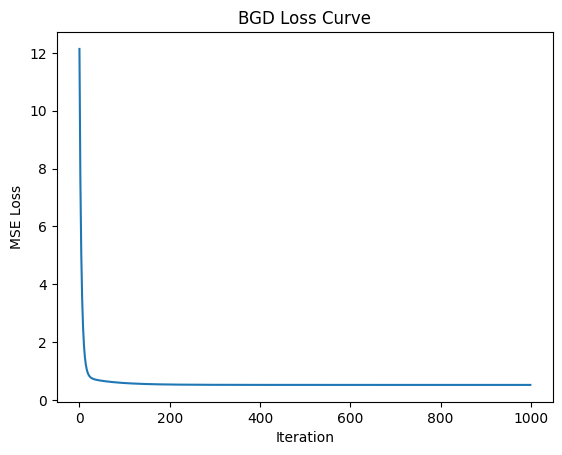

In [32]:
#以下为使用梯度下降法求解加州房价数据集的线性回归模型
#对比直接使用sklearn的LinearRegression模型，使用MSE评价
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. 加载并预处理数据
housing = fetch_california_housing()
X, y = housing.data, housing.target.reshape(-1, 1) # y 转为列向量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 【关键】特征标准化：将所有特征缩放到均值为0，方差为1 （梯度下降对特征尺度敏感，标准化可以加速收敛）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 添加偏置项列 (1)，使用矩阵加速计算
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# 记录损失变化
loss_history = []

# 2. 梯度下降法实现线性回归
# 随机初始化参数
alpha = 0.1  # 学习率
n_iterations = 1000 # 迭代次数
n_samples, n_features = X_b.shape # 样本数量和特征数量
beta = np.random.randn(n_features, 1) # 参数初始化

for iteration in range(n_iterations):
    #计算矩阵形式的参数解
    gradients = 1/n_samples* X_b.T@(X_b@beta-y_train)

    beta=beta-alpha*gradients

    # 记录当前 MSE
    current_loss = mean_squared_error(y_train, X_b.dot(beta))
    loss_history.append(current_loss)

# 3. 结果验证
y_pred = X_test_b.dot(beta)
final_mse = mean_squared_error(y_test, y_pred)

print(f"BGD 最终测试集 MSE: {final_mse:.6f}")
#画出损失函数的下降曲线
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('BGD Loss Curve')
plt.show()

In [ ]:
#使用sklearn的梯度下降法求解线性回归模型
from sklearn.linear_model import SGDRegressor

# 代入模型
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"SGDRegressor 测试集 MSE: {mse_sgd:.6f}")

SGDRegressor 测试集 MSE: 0.537681


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 附录


正规方程组(单特征x下)求解推导过程：
1. $\sum_{i=1}^{n} (y_i - wx_i - b) = 0$  ，由 $\frac{\partial S}{\partial b} = 0$ 整理得来
2. $\sum_{i=1}^{n} (y_i - wx_i - b)x_i = 0$ ，由 $\frac{\partial S}{\partial w} = 0$ 整理得来

- 先解 $b$，利用求和符号的分配律展开方程 (1)：$$\sum y_i - w\sum x_i - \sum b = 0$$注意 $\sum_{i=1}^{n} b = nb$，所以：$$nb = \sum y_i - w\sum x_i$$两边同时除以 $n$：$$b = \bar{y} - w\bar{x}$$其中 $\bar{y}$ 和 $\bar{x}$ 是均值。这说明：最佳拟合直线一定经过样本的中心点。

- 再解 $w$,将解出的 $b$ 代入方程 (2) 中，通过一系列繁琐的移项、合并同类项，最终就能得到回归系数公式：$$w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$


梯度下降矩阵解推导：

1. 准备工作：定义损失函数我们的目标是最小化均方误差（MSE）。设样本数为 $n$：
   $$J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$
   (这里加入 $1/2$ 是为了抵消平方求导产生的 $2$，不影响最优点的位置)写成矩阵形式：
   $$J(\beta) = \frac{1}{2n} (X\beta - y)^T (X\beta - y)$$
   
2. 展开矩阵乘法我们要把这个括号拆开。利用矩阵转置的性质 $(A-B)^T = A^T - B^T$：
   $$J(\beta) = \frac{1}{2n} (\beta^TX^T - y^T) (X\beta - y)$$
   利用分配律展开：
   $$J(\beta) = \frac{1}{2n} [\beta^TX^TX\beta - \beta^TX^Ty - y^TX\beta + y^Ty]$$
   由于 $\beta^TX^Ty$ 是一个标量（$1 \times 1$ 的数），它的转置等于它本身，即：
   $$\beta^TX^Ty = (\beta^TX^Ty)^T = y^TX\beta$$
   所以中间两项可以合并：
   $$J(\beta) = \frac{1}{2n} [\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty]$$


3. 对 $\beta$ 求偏导现在我们对向量 $\beta$ 进行求导。这里需要用到两个矩阵求导的黄金法则：
- 线性法则：$\frac{\partial (a^T\beta)}{\partial \beta} = a$
- 二次型法则：$\frac{\partial (\beta^TA\beta)}{\partial \beta} = 2A\beta$ 

（当 $A$ 为对称矩阵时）逐项求导：第一项 $\beta^T(X^TX)\beta$：对应二次型法则，其中 $X^TX$ 是对称阵。导数为 $2X^TX\beta$。第二项 $-2\beta^T(X^Ty)$：对应线性法则。导数为 $-2X^Ty$。第三项 $y^Ty$：不含 $\beta$，导数为 $0$。

4. 最终结果把导数结果合并起来：
   $$\nabla J = \frac{\partial J}{\partial \beta} = \frac{1}{2n} [2X^TX\beta - 2X^Ty]$$
   消掉常数 $2$：
   $$\nabla J = \frac{1}{n} [X^TX\beta - X^Ty]$$
   提取公因子 $X^T$：
   $$\nabla J = \frac{1}{n} X^T (X\beta - y)$$
   令$\nabla J = 0$，就能直接解出 
   $$\beta = (X^TX)^{-1}X^Ty$$
- 其中$(X\beta - y)$是误差向量。它告诉我们模型对每个样本预测偏离了多少。
- X^T：这是特征的转置。它起到了“权重分配”的作用
- 衡量了每个特征与误差的相关性
  - 如果某个特征 $x_j$ 的值很大，且误差也很大，那么两项相乘得到的梯度就大，意味着这个特征的权重 $\beta_j$ 需要剧烈调整。
  - 如果误差已经是 0，那么梯度就是 0，模型停止更新。